# Credit Score
En este proyecto se propone la construcción de modelo predictivo que permita determinar el comportamiento de un buen o mal cliente, a partir de su historial de pago de un crédito.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Database Description

Descripción de la base de datos de la entidad bancaria.

|Variables            |Descripción|
|---------------------|---|
|ID                   |Llave de identificación|
|Periodo              |Fecha de Observación (AAAAMM)|
|Dias 0-6             |Dias0: cantidad de días en mora, a la fecha de observación|
| |Dias1: cantidad de días en mora, un mes después de la observación.| 
| |...|
| |Dias6: cantidad de días en mora, seis meses después de la observación|
|Número_Producto      |Número de productos a la fecha|
|Genero               |Género (M-F)|
|Saldo_Mora 1-6(Pesos)|Saldo_Mora1: saldo del crédito en mora, un mes después de la observación|
|| ...|
|| Saldo_Mora6: saldo del crédito en mora, seis meses después de la observación|
|Cupo (Pesos)         |Monto del crédito otorgado|
|Saldo 1-6 (Pesos)    |Saldo1: saldo del crédito, un mes después de la observación|
|| ...|
|| Saldo6: saldo del crédito, seis meses después de la observación|

# 1. Data Pre-Processing

In [2]:
df = pd.read_csv('Anonimizada_DataBase.txt', delimiter = '|')

In [3]:
df.head()

,Identificador,periodo,DIAS1,DIAS2,DIAS3,DIAS4,DIAS5,DIAS6,DIAS0,Numero_Producto,...,Saldo1,Saldo_Mora3,Saldo2,Saldo_Mora4,Saldo3,Saldo_Mora5,Saldo4,Saldo_Mora6,Saldo5,Saldo6
0,92966525716,201709,7.0,6.0,0.0,0.0,0.0,4.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92967390638,201709,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,"14493557,79","294570,52","14383360,76","294569,96","14271872,86","294569,05","14159078,99","294567,62","14044963,84","13929511,94"
2,92967489284,201712,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,NaN,0,0,12262,3524442,49553,"3516034,8",41122,"2989794,73","2830734,73"
3,92966459151,201809,0.0,0.0,0.0,0.0,0.0,NaN,0,2,...,9738321.38,32433,32433,32433,32433,32433,32433,32433,32433,0
4,92966529824,201712,0.0,0.0,0.0,0.0,0.0,5.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Identificador    30000 non-null  int64  
 1   periodo          30000 non-null  int64  
 2   DIAS1            29213 non-null  float64
 3   DIAS2            28616 non-null  float64
 4   DIAS3            28070 non-null  float64
 5   DIAS4            27369 non-null  float64
 6   DIAS5            26792 non-null  float64
 7   DIAS6            22642 non-null  float64
 8   DIAS0            30000 non-null  int64  
 9   Numero_Producto  30000 non-null  int64  
 10  GENERO           23819 non-null  object 
 11  Saldo_Mora1      21592 non-null  object 
 12  Cupo             21592 non-null  object 
 13  Saldo_Mora2      22213 non-null  object 
 14  Saldo1           22213 non-null  object 
 15  Saldo_Mora3      22877 non-null  object 
 16  Saldo2           22877 non-null  object 
 17  Saldo_Mora4 

## Se deben hacer cambios de tipo de datos en algunas columnas. La columna Periodo, debe tener formato de fecha y las columnas Cupo y Saldo y DIAS0 deben ser tipo float. 

### Periodo

In [5]:
df['periodo'].dtypes

dtype('int64')

In [6]:
#Resultados en meses 
#df['periodo'] = pd.to_datetime(df['periodo'], format='%Y%m', errors='coerce').dt.to_period('m')
df['periodo'] = pd.to_datetime(df['periodo'], format='%Y%m', errors='coerce')

In [7]:
df['periodo'].dtypes

dtype('<M8[ns]')

### Cupo y Saldo

In [8]:
columns = ['Cupo', 'Saldo_Mora1', 'Saldo_Mora2', 'Saldo_Mora3', 'Saldo_Mora4', 
           'Saldo_Mora5', 'Saldo_Mora6', 'Saldo1', 'Saldo2', 'Saldo3', 'Saldo4', 
           'Saldo5', 'Saldo6']
for colum in columns:
    df[colum] = pd.to_numeric(df[colum], downcast='float', errors = 'coerce').astype(float)

### DIAS0

In [9]:
df['DIAS0'] = df['DIAS0'].astype(float)

## Index. Se define el index de la base de datos con la columna Identificador. Las entradas de campo deben ser únicas, así que se deben hacer un filtrado. 

In [10]:
print('Se tienen', df['Identificador'].count(), 'entradas.')

Se tienen 30000 entradas.


In [11]:
print('Solo', df['Identificador'].nunique(), 'don únicas')

Solo 18101 don únicas


In [12]:
# Se Eliminan datos repetidos
df = df.drop_duplicates(subset=['Identificador'],  keep= False)

In [13]:
#Se elije la comuna Identificador como Index 
df = df.set_index('Identificador')

In [14]:
#Se eliminan entradas con valores Nan
df = df.dropna()

In [15]:
df.head()

,periodo,DIAS1,DIAS2,DIAS3,DIAS4,DIAS5,DIAS6,DIAS0,Numero_Producto,GENERO,...,Saldo1,Saldo_Mora3,Saldo2,Saldo_Mora4,Saldo3,Saldo_Mora5,Saldo4,Saldo_Mora6,Saldo5,Saldo6
Identificador,,,,,,,,,,,,,,,,,,,,,
92966498191,2017-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,F,...,826282.0,22918.0,880038.0,21547.0,875198.0,22184.0,859556.0,23081.0,844034.0,827736.0
92966442488,2017-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92967417881,2018-06-01,42.0,73.0,101.0,134.0,164.0,192.0,10.0,2,M,...,10262.0,800.0,10534.0,117.0,10249.0,10607.0,20572.0,23824.0,21573.0,81389.0
92966457920,2018-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,F,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42020.0
92966454154,2017-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,M,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Información de Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 92966498191 to 92966442639
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   periodo          781 non-null    datetime64[ns]
 1   DIAS1            781 non-null    float64       
 2   DIAS2            781 non-null    float64       
 3   DIAS3            781 non-null    float64       
 4   DIAS4            781 non-null    float64       
 5   DIAS5            781 non-null    float64       
 6   DIAS6            781 non-null    float64       
 7   DIAS0            781 non-null    float64       
 8   Numero_Producto  781 non-null    int64         
 9   GENERO           781 non-null    object        
 10  Saldo_Mora1      781 non-null    float64       
 11  Cupo             781 non-null    float64       
 12  Saldo_Mora2      781 non-null    float64       
 13  Saldo1           781 non-null    float64       
 14  Saldo_Mora3      781 non

In [17]:
print('La base de datos tiene:', len(df), 'entradas.')

La base de datos tiene: 781 entradas.


# 2. Análisis Descriptivo

Se hace una breve descrioción de las variables númericas del problema

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DIAS1,781.0,4.472471e+00,1.802337e+01,0.0,0.0,0.0,0.0,118.0
DIAS2,781.0,5.692702e+00,2.324083e+01,0.0,0.0,0.0,0.0,134.0
DIAS3,781.0,6.955186e+00,2.831457e+01,0.0,0.0,0.0,0.0,163.0
DIAS4,781.0,8.562100e+00,3.387629e+01,0.0,0.0,0.0,0.0,195.0
DIAS5,781.0,1.012420e+01,4.033731e+01,0.0,0.0,0.0,0.0,226.0
DIAS6,781.0,1.134187e+01,4.488852e+01,0.0,0.0,0.0,0.0,254.0
DIAS0,781.0,4.329065e+00,1.384161e+01,0.0,0.0,0.0,0.0,86.0
Numero_Producto,781.0,1.204866e+00,5.896778e-01,1.0,1.0,1.0,1.0,6.0
Saldo_Mora1,781.0,7.817730e+03,7.576060e+04,0.0,0.0,0.0,0.0,2028684.0
Cupo,781.0,1.542386e+06,1.458452e+07,0.0,0.0,0.0,0.0,313138080.0


# 3. Feature Engineering

In [19]:
df_features = pd.DataFrame([])

## Saldo promedio de los ultimos 6 meses

In [20]:
df_features['Saldo_Promedio'] = df[['Saldo1','Saldo2','Saldo3','Saldo4','Saldo5','Saldo6']].mean(axis=1)

## Saldo máximo en el primer trimestre.

In [21]:
df_features['Saldo_Max'] = df[['Saldo1','Saldo2','Saldo3']].max(axis=1)

## Flag género

In [22]:
df_features['Flag_Genero'] = df.GENERO.eq('F').mul(1)

## Porcentaje promedio de saldo en mora con respecto al cupo en los 6 meses.

In [23]:
s_m_prom = df[['Saldo_Mora1','Saldo_Mora2','Saldo_Mora3','Saldo_Mora4','Saldo_Mora5','Saldo_Mora6']].mean(axis=1)
#s_m_max = df[['Saldo_Mora1','Saldo_Mora2','Saldo_Mora3','Saldo_Mora4','Saldo_Mora5','Saldo_Mora6']].max(axis=1)
df_features['Porc_prom_Saldo_mora'] = s_m_prom/ df['Cupo'] 

In [24]:
#Cuando s_m_max es 0 significa que no tiene saldo de mora, por lo tanto el porcentaje promedio de saldo 
#en mora es 0
df_features['Porc_prom_Saldo_mora'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_features['Porc_prom_Saldo_mora'] = df_features['Porc_prom_Saldo_mora'].fillna(0)*100

## Utilización máxima de los últimos 6 meses 
Se calcula la utilización de la cuenta como Saldo/Cupo.

In [25]:
df_features['util_max_seis'] = df['Saldo6'] / df['Cupo'] 
df_features['util_max_seis'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_features['util_max_seis'] = df_features['util_max_seis'].fillna(0)

## Cupo promedio de los primeros 3 meses 
Se calcula como Cupo/Número_Productos.

In [26]:
df_features['Cupo_prom'] = df['Cupo']/df['Numero_Producto'] 

## Antigüedad de la obligación en meses a 201908.

In [27]:
df['date'] = 201908
df['date'] = pd.to_datetime(df['date'], format='%Y%m', errors='coerce')

In [28]:
df_features['Antiguedad'] = ((df.date - df.periodo)/np.timedelta64(1, 'M'))

# 4. Segmentation Class
Se crean dos etiquetas para los clientes tomando 0 como clientes buenos y 1 como clientes malos  

In [29]:
#Clientes que que luego de los 6 meses hayan alcanzado un máximo de 30 días en mora
df_features['Tipo_Cliente_1'] = 0

In [30]:
for i, cli in enumerate(df_features['Tipo_Cliente_1']):
    ix = df_features['Tipo_Cliente_1'].index[i]
    if df.at[ix, 'DIAS6']  > 30:
        df_features.at[ix, 'Tipo_Cliente_1'] = 1

df_features['Tipo_Cliente_1'].value_counts()

0    731
1     50
Name: Tipo_Cliente_1, dtype: int64

In [31]:
#Clientes que que luego de los 6 meses hayan alcanzado un máximo de 90 días en mora.
df_features['Tipo_Cliente_2'] = 0

In [32]:
for i, cli in enumerate(df_features['Tipo_Cliente_2']):
    ix = df_features['Tipo_Cliente_2'].index[i]
    if df.at[ix, 'DIAS6']  > 90:
        df_features.at[ix, 'Tipo_Cliente_2'] = 1

df_features['Tipo_Cliente_2'].value_counts()

0    740
1     41
Name: Tipo_Cliente_2, dtype: int64

# 5. Model training

In [33]:
#Variable categorica
y_1 = df_features['Tipo_Cliente_1'].values
y_2 = df_features['Tipo_Cliente_2'].values

In [34]:
features_num = len(df_features.columns) 

In [35]:
#Caracterisiticas del problema 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df_features.iloc[:,:features_num].values
scaler.fit(X)
X = scaler.transform(X)

In [36]:
X.shape

(781, 9)

In [37]:
#Entranamiento del problema
from sklearn.model_selection import train_test_split

In [38]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y_1, test_size=0.33, random_state=42,
                                                            stratify=y_1, shuffle=True)

In [39]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y_2, test_size=0.33, random_state=42,
                                                            stratify=y_2, shuffle=True)

In [40]:
grid = [i for i in range(1, 11, 1)]
param_grid = {'C': [np.round((0.1*i), decimals =2) for i in grid]}
print('Parameters:', param_grid)

Parameters: {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

clf = GridSearchCV(LogisticRegression(solver= 'liblinear'), 
                   param_grid = param_grid, verbose=0, return_train_score=True, 
                   n_jobs=-1, cv=5)

# 6. Models Evaluation

In [42]:
class_names = np.array(['Buen Cliente', 'Mal Cliente'])

In [43]:
clf.fit(X_train_1, y_train_1) 

print('Best Params:', clf.best_params_, '\n')
y_pred_1 = clf.predict(X_test_1)
print(classification_report(y_test_1, y_pred_1))

Best Params: {'C': 0.1} 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00        17

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



[]

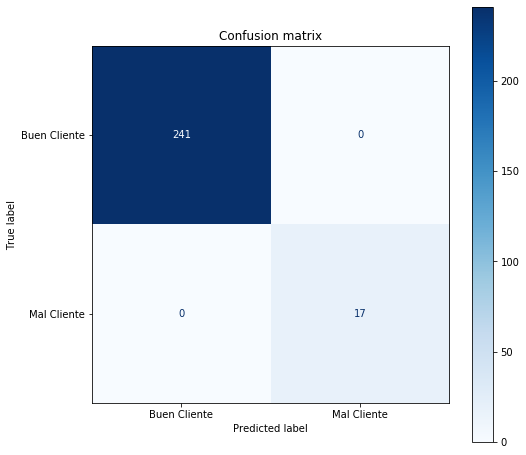

In [44]:
title = "Confusion matrix"
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf, X_test_1, y_test_1,
                      display_labels = class_names,
                      cmap = plt.cm.Blues,
                      normalize = None, ax=ax)
ax.set_title(title)
plt.savefig('./results/Model_1.png', format='png', bbox_inches='tight')
plt.plot()

In [45]:
clf.fit(X_train_2, y_train_2) 

print('Best Params:',clf.best_params_, '\n')
y_pred_2 = clf.predict(X_test_2)
print(classification_report(y_test_2, y_pred_2))

Best Params: {'C': 0.1} 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       1.00      1.00      1.00        14

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



[]

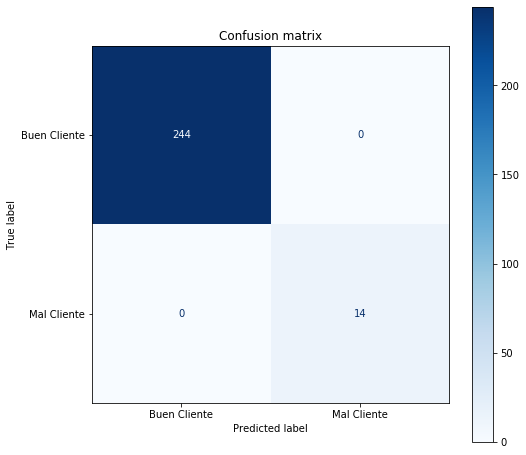

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(clf, X_test_2, y_test_2,
                      display_labels = class_names,
                      cmap = plt.cm.Blues,
                      normalize = None, ax=ax)
ax.set_title(title)
plt.savefig('./results/Model_2.png', format='png', bbox_inches='tight')
plt.plot()